<a href="https://colab.research.google.com/github/dblack954/problem-statistics/blob/main/Lab_10_Dylan_Black.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

### Imports

In [2]:
import numpy as np    # Importing numpy functions
import matplotlib.pyplot as plt   # Import plotting tools
import urllib.request   # Importing a python tool that fetches url data
from PIL import Image   # Importing images from Python Imaging Library
from imageio import *     # Importing an image data tool
import torch    # Importing torch
from skimage.transform import resize    # Importing skimage.transform, which is
# a tool for geometric transformations of images
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes   # Two
# components allow you to create and manipulate RGB plots in matplotlib
from torchvision.models import *  # Importing torchvision models, which allows
# you to easily access and use any of these models in your own code
from torchvision.datasets import MNIST,KMNIST,FashionMNIST  # Imports three
# different datasets from the torchvision.datasets module. MNIST is a collection
# of 70,000 handwritten digits, KMNIST is similar to MNIST but with distorted
# numbers, FashionMNIST is a collection of 70,000 images of clothing items
from skimage.util import montage  # Imports the montage function which is used to
# create a composite image from a collection of smaller images

In [3]:
!pip install wandb    # Installing weights and biases, using the pip package
# manager
import wandb as wb    # Importing Weights and Biases

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.9 MB/s eta 0:00:00


In [4]:
def plot(x):      # Defining Plot
    if type(x) == torch.Tensor :    # Conditional statement that whether x is a
    # PyTorch tensor
        x = x.cpu().detach().numpy()    # Converts a PyTorch tensor x to a
        # Numpy array

    fig, ax = plt.subplots()    # Creating a figure and an axes
    im = ax.imshow(x, cmap = 'gray')    # axis showing x with a gray colormap
    ax.axis('off')   # axis is turned off
    fig.set_size_inches(5, 5)   # figure size
    plt.show()    # Showing Plot

In [5]:
def montage_plot(x):    # defining montage plot
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    # Pads the input array "x" with zeros
    plot(montage(x))    # plotting the montage plot

In [6]:
b = 1000                        # Batch size or sample size

def get_batch(mode):    # Defining get_batch function, which retrieves a batch
# of data from a dataset
    if mode == "train":       # Training the code
        r = np.random.randint(X.shape[0]-b)   # Generates a random integer "r"
        # between 0 and X.shape
        x = X[r:r+b,:]    # extracting a submatrix from the NumPy array X
        y = Y[r:r+b]      # extracting a submatrix from the NumPy array Y
    elif mode == "test":      # Testing the code
        r = np.random.randint(X_test.shape[0]-b)    # Generates a random integer
        # "r" between 0 and X_test.shape
        x = X_test[r:r+b,:] # extracting a submatrix from the NumPy array X_test
        y = Y_test[r:r+b]   # extracting a submatrix from the NumPy array Y_test
    return x,y      # Return fucntion for x,y


## MNIST
    

### Load Data

In [7]:
# #MNIST
train_set = MNIST('./data', train=True, download=True)  # Basically a "Practice Test" version of an exam for the code to run
test_set  = MNIST('./data', train=False, download=True)  # Basically a "Final Test" version of an exam for the code to run

#KMNIST
# train_set = KMNIST('./data', train=True, download=True)
# test_set =  KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = FashionMNIST('./data', train=True, download=True)
# test_set =  FashionMNIST('./data', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 320491125.41it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 59032989.19it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 161529636.73it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 24299143.84it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [8]:
X = train_set.data.numpy()    # Converting the train_set data to a numpy array
# for "X", "X_test", "Y", and "Y_test"
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255       # Inserts a new axis at index 1 of the array X, and
# then divided by 255
X_test = X_test[:,None,:,:]/255   # Same code as previous but with array X_test

In [9]:
X.shape   # The size of X

(60000, 1, 28, 28)

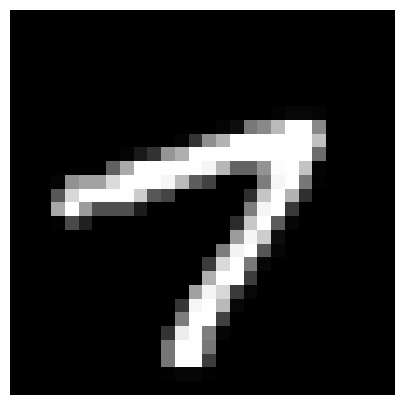

In [10]:
plot(X[101,0,:,:])    # Plotting the 101st image from the array X

In [11]:
Y[100]    # Accesses the 100th element of the numpy array "Y"

5

In [12]:
X[0:25,0,:,:].shape     # The size of a slice of "X"

(25, 28, 28)

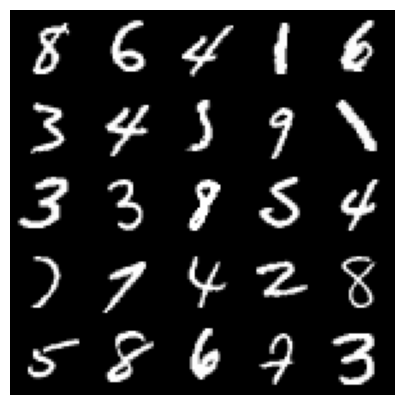

In [13]:
montage_plot(X[125:150,0,:,:])    # Montage plot from the 125th to the 150th image
# from the array "X"

In [14]:
X.shape[0]    # The number of rows in "X"

60000

In [15]:
X_test.shape    # The shape of "X_test"

(10000, 1, 28, 28)

In [16]:
X.shape[0]    # The number of rows of "X"

60000

In [17]:
X_test.shape[0]   # The number of rows of "X_test"

10000

In [18]:
def GPU(data):    # Defining GPU data
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))
    # Return function that creates a pytorch tensor from the input data and moves
    # it to the GPU, will be tracked for gradient calculations

def GPU_data(data): # Defining GPU_data data
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))
    # Similar return function to GPU data's return, but will not be tracked for
    # gradient calculations

In [19]:
X = GPU_data(X)   # X data of GPU data assigned to "X"
Y = GPU_data(Y)   # Y data of GPU data assigned to "Y"
X_test = GPU_data(X_test)   # X_test of GPU data is assigned to X_test
Y_test = GPU_data(Y_test)   # Y_test of GPU data is assigned to Y_test

In [20]:
X = X.reshape(X.shape[0],784)   # Reshaping the numpy array X to have X.shape[0]
# rows and 784 columns
X_test = X_test.reshape(X_test.shape[0],784)    # Reshaping the numpy array X_test
# to have X_test.shape[0] rows and 784 columns


### Classifier


In [21]:
x,y = get_batch('train')    # Returning a batch of data from the training dataset

In [22]:
x.shape   # The Shape of "x"

torch.Size([1000, 784])

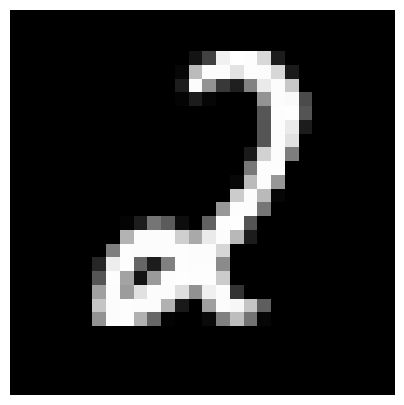

In [23]:
plot(x[0].reshape(28,28))   # Plotting the first image of a x reshape function

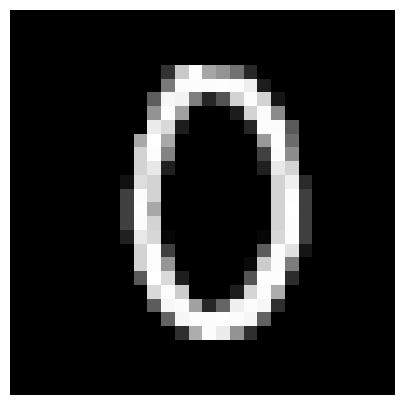

In [24]:
plot(x[1].reshape(28,28))   # Plotting the second image of the x reshape function

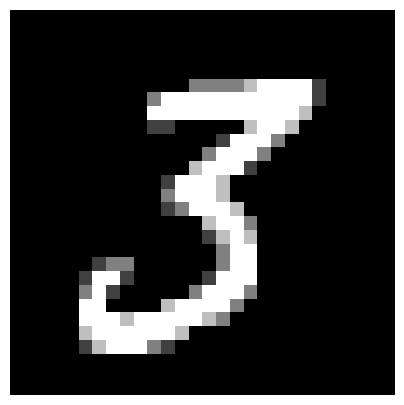

In [25]:
plot(x[2].reshape(28,28))   # Plotting the third image of the x reshape fucntion

In [26]:
y[:10]    # Showing the first ten elements of the array "y"

tensor([2., 0., 3., 7., 2., 4., 9., 7., 8., 8.], device='cuda:0')

In [27]:
W = GPU(np.random.randn(784,10))      # Creating a tensor called "W" on the GPU
# with a set of random numbers

In [28]:
x.shape, W.shape          # The shape of "x" and "W"

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [29]:
torch.matmul(x,W).shape   #The shape of the matrix mulitplication of "x" and "W"

torch.Size([1000, 10])

In [30]:
(x@W).shape   # Same code as previous line but using the "@" symbol insetad of
# using "torch.matul"

torch.Size([1000, 10])

In [31]:
%%timeit
x@W                       #How long doe it take to upload the answer

21.9 µs ± 1.63 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [32]:
x@W           #The answer to "x@W"

tensor([[-10.6356,  -2.8402,   9.0807,  ...,   5.7140,  -2.8623,  -5.8540],
        [ -2.7105, -10.9842,   3.2825,  ...,  -0.4946,  -2.9488,   2.6346],
        [  7.0332,   2.2626,   1.0062,  ...,   6.8751,  12.3935,  -5.9277],
        ...,
        [ -0.0829,  -4.4159, -11.5855,  ...,   1.5019,  12.3787,  -4.8368],
        [  1.0261,   3.4247,   3.4977,  ...,   5.2676,  -5.0827,  -2.3328],
        [ 12.3862,   0.4355,  -6.4594,  ...,  -6.3987,  -5.7216,   2.1723]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [33]:
y2 = x@W    #"y2" is being displayed as the matrix multiplication of "x" and "W"

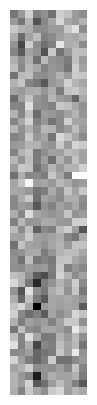

In [34]:
plot(y2[:50])   # Plotting the first fifty elements of "y2"

In [35]:
y   # The result of "y"

tensor([2., 0., 3., 7., 2., 4., 9., 7., 8., 8., 5., 4., 2., 9., 6., 2., 2., 1.,
        4., 9., 8., 2., 4., 2., 6., 3., 5., 1., 0., 4., 1., 3., 2., 0., 3., 5.,
        4., 9., 5., 3., 6., 1., 7., 5., 8., 9., 9., 5., 0., 4., 1., 4., 2., 6.,
        3., 4., 4., 9., 5., 7., 6., 1., 7., 6., 8., 6., 9., 7., 0., 0., 3., 2.,
        4., 9., 5., 2., 6., 7., 7., 3., 8., 8., 9., 2., 9., 0., 7., 0., 5., 7.,
        2., 3., 9., 8., 0., 3., 1., 3., 5., 3., 8., 7., 8., 3., 0., 5., 9., 3.,
        3., 9., 2., 5., 7., 1., 8., 0., 4., 5., 4., 2., 5., 7., 9., 3., 6., 8.,
        1., 4., 0., 3., 4., 1., 5., 8., 3., 0., 9., 7., 4., 2., 2., 8., 0., 5.,
        5., 1., 0., 9., 1., 8., 6., 3., 9., 2., 3., 3., 2., 0., 9., 6., 1., 5.,
        6., 6., 0., 0., 1., 8., 1., 6., 8., 4., 0., 4., 4., 0., 7., 4., 7., 3.,
        6., 9., 0., 7., 7., 1., 3., 7., 5., 8., 4., 2., 2., 2., 4., 1., 1., 3.,
        8., 1., 3., 4., 5., 6., 6., 8., 7., 5., 0., 9., 6., 2., 7., 2., 1., 1.,
        2., 5., 5., 6., 8., 8., 1., 9., 

In [36]:
y.shape   # The shape of "y"

torch.Size([1000])

In [37]:
def one_hot(y):   # defining "one_hot", which is converting a list of arrays into
# a one-hot encoded matrix
    y2 = GPU_data(torch.zeros((y.shape[0],10)))   # Creating a tensor on the GPU
    # filled with zeros
    for i in range(y.shape[0]):   # iterating the rows of the tensor "y"
        y2[i,int(y[i])] = 1   # "y2" is being set to the row of i and the column
        # of 1
    return y2     # Return function of "y2"

In [38]:
one_hot(y)            #Choosing the largest selection (What is the hottest one)

<ipython-input-18-656cd86329c5>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [39]:
torch.argmax(y2,1)    # Finds the index of the maximum value along each row of "y2"

tensor([2, 6, 8, 3, 6, 5, 8, 8, 8, 7, 8, 2, 2, 2, 2, 8, 6, 8, 2, 8, 9, 9, 2, 9,
        2, 8, 2, 9, 7, 2, 8, 7, 7, 6, 6, 0, 2, 2, 1, 8, 7, 8, 2, 0, 8, 0, 2, 0,
        2, 6, 2, 9, 7, 5, 9, 9, 2, 8, 0, 0, 7, 9, 2, 8, 8, 7, 2, 0, 2, 2, 0, 6,
        2, 0, 0, 6, 2, 6, 8, 9, 8, 8, 8, 7, 8, 5, 8, 6, 0, 5, 9, 8, 8, 8, 2, 9,
        2, 8, 1, 8, 8, 0, 8, 9, 6, 6, 8, 9, 0, 9, 2, 6, 8, 8, 8, 6, 2, 6, 8, 9,
        0, 8, 2, 6, 7, 2, 2, 0, 2, 1, 2, 1, 0, 6, 6, 6, 2, 0, 8, 9, 2, 6, 6, 0,
        0, 9, 2, 0, 2, 8, 7, 9, 2, 2, 0, 8, 7, 7, 2, 2, 6, 2, 3, 9, 2, 2, 2, 0,
        2, 7, 8, 9, 1, 7, 6, 0, 2, 2, 2, 8, 7, 0, 2, 9, 2, 8, 8, 9, 8, 0, 8, 2,
        6, 9, 6, 0, 2, 9, 8, 2, 1, 0, 0, 8, 7, 9, 2, 0, 2, 2, 7, 2, 2, 6, 6, 1,
        2, 8, 0, 7, 0, 9, 2, 0, 8, 9, 7, 1, 8, 1, 7, 9, 8, 9, 8, 8, 2, 6, 8, 0,
        5, 6, 2, 8, 7, 2, 8, 7, 8, 8, 8, 0, 0, 0, 8, 0, 0, 5, 2, 6, 2, 9, 8, 6,
        2, 2, 2, 6, 2, 8, 5, 9, 0, 0, 2, 7, 7, 8, 6, 9, 2, 8, 8, 9, 0, 2, 2, 7,
        2, 8, 1, 0, 8, 2, 2, 6, 2, 0, 7,

In [40]:
torch.sum(y == torch.argmax(y2,1))/b          # "Average score" of guessing the questions, in a sense

tensor(0.1360, device='cuda:0')

In [41]:
X.shape         # The shape of "X"

torch.Size([60000, 784])

In [42]:
X@W   # The multiplication matrix of "X" and "W"

tensor([[ 10.5196,  -0.0736,   2.6711,  ...,   2.8419,  -4.2660,  -5.3325],
        [  6.0991,  -1.3923,   3.1523,  ...,  -3.3613,  -1.0031,  -7.1127],
        [  7.4736,   0.9303,  -2.3490,  ..., -10.8738,  -5.5657,  10.8925],
        ...,
        [  7.0208,   3.6649,  -1.1042,  ...,  -4.1298,   8.9220,  -8.7824],
        [ -7.8311, -12.1302,   4.4197,  ...,   6.3656,  -2.7223, -13.5976],
        [ -0.7848,  -5.1902,   8.8281,  ...,   1.9810,   8.9958,  -3.2451]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [43]:
torch.argmax(X@W,1)   # Finding the maximum value along each row of the matrix of
# "X@W"

tensor([0, 0, 9,  ..., 8, 7, 8], device='cuda:0')

In [44]:
Y   # The result of "Y"

tensor([5., 0., 4.,  ..., 5., 6., 8.], device='cuda:0')

In [45]:
torch.sum(torch.argmax(X@W,1) == Y)/60000     # Calculating the accuracy of the
# predictions made by the matrix multiplication of "X" and "W" and divided by the
# number of samples

tensor(0.1456, device='cuda:0')

In [46]:
X@W   # The result of the mulitplication matrix of "X@W"

tensor([[ 10.5196,  -0.0736,   2.6711,  ...,   2.8419,  -4.2660,  -5.3325],
        [  6.0991,  -1.3923,   3.1523,  ...,  -3.3613,  -1.0031,  -7.1127],
        [  7.4736,   0.9303,  -2.3490,  ..., -10.8738,  -5.5657,  10.8925],
        ...,
        [  7.0208,   3.6649,  -1.1042,  ...,  -4.1298,   8.9220,  -8.7824],
        [ -7.8311, -12.1302,   4.4197,  ...,   6.3656,  -2.7223, -13.5976],
        [ -0.7848,  -5.1902,   8.8281,  ...,   1.9810,   8.9958,  -3.2451]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [47]:
W.shape   # The shape of "W"

torch.Size([784, 10])

In [48]:
W[:,0].shape    # The shape of the first element of "W"

torch.Size([784])

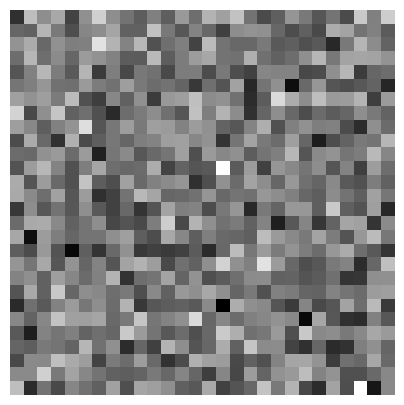

In [49]:
plot(W[:,0].reshape(28,28))   # Plotting the first element of "W" with a reshape
# function

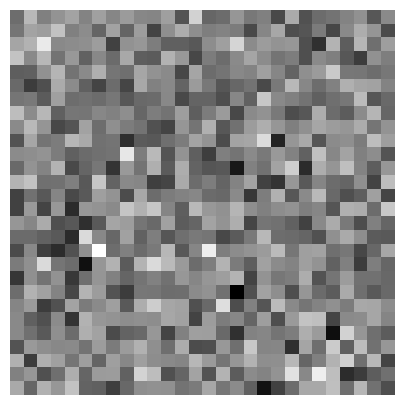

In [50]:
plot(W[:,2].reshape(28,28))   # Plotting the third element of "W" with a reshape
# function

In [51]:
W.shape   # The shape of "W"

torch.Size([784, 10])

In [52]:
(W.T).shape   # The shape of a transposed "W"

torch.Size([10, 784])

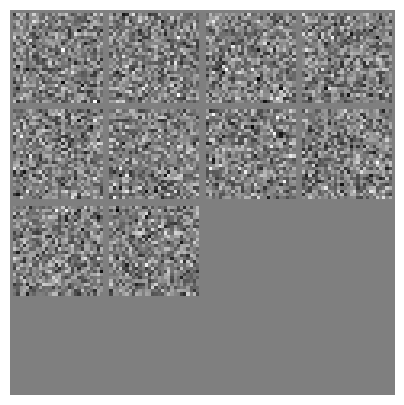

In [53]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())
# Plotting a montage of the wieghts in the transpose of the tensor "W" with a
# reshape fucntion, detaching the tensor from the computation graph, and converting
# it to a numpy array

In [54]:
def softmax(x):   # Defining the softmax function
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])   # Calculates the exponentials
    # of the elements within "x" after subtracting the maximum value in each row
    s = s1 / s1.sum(1)[:,None]    # Calculates the softmax function for "s1"
    return s    # Return function of "s"

In [55]:
def cross_entropy(outputs, labels):             # How many did it get correct
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [56]:
def acc(out,y):           # The accuracy code
    return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [57]:
def get_batch(mode):    # Defining a return batch of data function
    b = c.b   # Accesses the attribute "b" of the object of "c"
    if mode == "train":     # On the Training section of the data
        r = np.random.randint(X.shape[0]-b)   # Generating a random integer between
        # 0 and the shape of "X"
        x = X[r:r+b,:]    # Selecting a batch of rows from "b" from "X", starting
        # from the row "r"
        y = Y[r:r+b]    # Similar code to the previous line, but it is with "Y", and
        # it starts with the index of "r"
    elif mode == "test":    # On the testing section of the data
        r = np.random.randint(X_test.shape[0]-b)    # Generating a random integer
        # between 0 and shape of "X_test"
        x = X_test[r:r+b,:]   # Selecting a batch of rows from "b" from "X_test",
        # Starting from the row "r"
        y = Y_test[r:r+b]   # Similar code to the previous line, but it is with
        # "Y_test", and it starts with the index of "r"
    return x,y    # The return function of "x" and "y"

In [58]:
def model(x,w):     # Defining a mathematical model function

    return x@w[0]   # Return function of the first element of the multiplication
    # matrix of "x" and "w"

In [59]:
def gradient_step(w):   # defining a function that updates the weights of a model

    w[0].data = w[0].data - c.L*w[0].grad.data  # Updating the first layer of the
    # weights of the model

    w[0].grad.data.zero_()    # Resetting that first layer of weights to zero

In [60]:
def make_plots():   # Defining a fucntion that generates a line plot of the sine
# and cosine functions

    acc_train = acc(model(x,w),y)               # Accuracy through training

    xt,yt = get_batch('test')   # Retrieves a batch from the "test" dataset

    acc_test = acc(model(xt,w),yt)    # Accuracy through testing

    wb.log({"acc_train": acc_train, "acc_test": acc_test})    # Logging the accuracy
    # data to the weights and biases

In [61]:
def Truncated_Normal(size):   # Defining a truncated normal distribution function

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)  # Initalizing the weights
    # of the neural network
    u2 = torch.rand(size)   # Generating random input data for the neural network
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z    # Return function of "z"

In [ ]:
for run in range(3):    # Starting a loop that iterates three times

    wb.init(project="Simple_Linear_SGD_123");   # Initializing the weights and
    # biases for Project "Simple_Linear_SGD_123"
    c = wb.config   # Assigning the weights and biases configuration tool as "c"

    c.L = 0.1   #Setting the learning rate for the optimizer to 0.1
    c.b = 1024    # Setting the batch size for the optimizer to 1024
    c.epochs = 10000    # Setting the number of epochs to 10,000

    w = [GPU(Truncated_Normal((784,10)))]   # Intializing the wieghts of the model
    # using a truncated normal distribution

    for i in range(c.epochs):   # Startig a loop that iterates 10,000 times

        x,y = get_batch('train')    # Retrieving the Training dataset

        out = model(x,w)          # It's mx + b

        loss = cross_entropy(softmax(out),y)        # Calculating the answers and output

        loss.backward()     # Calculating the gradients of the loss function

        gradient_step(w)              # Updating the weights

        make_plots()      # Generating the plots

        if (i+1) % 10000 == 0: montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())
        # Checking if the current iteration "i" is a mulitple of 10,000, reshaping
        # the transpose of the first weight tnesor, moving the tensor to the CPU,
        # detaching the tensor from the computational graph, and converting it to
        # a numpy array

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

In [ ]:
for run in range(100):    # Starting a loop that iterates 100 times

    wb.init(project="Simple_Linear_Adam_2");    # Initializing the weights and biases
    # for Project "Simple_Linear_Adam_2"
    c = wb.config   # Assigning the wieghts and biases configuration tool as "c"

    c.L = 0.01    #Setting the learning rate for the optimizer to 0.1
    c.b = 1024    # Setting the batch size for the optimizer to 1024
    c.epochs = 100000  # Setting the number of epochs to 10,000

    w = [GPU(Truncated_Normal((784,10)))]     # Intializing the wieghts of the model
    # using a truncated normal distribution

    optimizer = torch.optim.Adam(w, lr=c.L)   # Creating an optimizer tool for the
    # model using the Adam algorithm

    for i in range(c.epochs):   # Starting a loop that iterates 10,000 times

        x,y = get_batch('train')    # Retrieving the Training dataset

        loss = cross_entropy(softmax(model(x,w)),y)   # Calculating the answers and output

        optimizer.zero_grad()   # Clearing the gradients of all optimized tensors
        loss.backward()   # Calculating the gradients of the loss function
        optimizer.step()    # Updating the weights of the model

        wb.log({"loss": loss})    #logging the loss values to Weights and Biases

        make_plots()      # Generating the plots

        if i % 10000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())
        # Checking if the current iteration "i" is a mulitple of 10,000, reshaping
        # the transpose of the first weight tnesor, moving the tensor to the CPU,
        # detaching the tensor from the computational graph, and converting it to
        # a numpy array


### Autoencoder


In [ ]:
def get_batch(mode):    # Defining a return batch of data mode
    b = 1024    # Batch is equal to 1024
    if mode == "train":   # Retrieving the Training dataset
        r = np.random.randint(X.shape[0]-b)  # Generating a random integer between
        # 0 and the shape of "X"
        x = X[r:r+b,:]    # Selecting a batch of rows from "b" from "X",
        # Starting from the row "r"
        y = Y[r:r+b]    # Similar code to the previous line, but it is with
        # "Y", and it starts with the index of "r"
    elif mode == "test":    # Retrieving the Testing dataset
        r = np.random.randint(X_test.shape[0]-b)  # Generating a random integer between
        # 0 and the shape of "X_test"
        x = X_test[r:r+b,:]  # Selecting a batch of rows from "b" from "X_test",
        # Starting from the row "r"
        y = Y_test[r:r+b]   # Similar code to the previous line, but it is with
        # "Y_test", and it starts with the index of "r"
    return x,y    # Return function of "x" and "y"

In [ ]:
X = X.reshape(X.shape[0],1,28,28)   # Reshaping the input tnesor "X" to have an
# additional channel dimension
X_test = X_test.reshape(X_test.shape[0],1,28,28)    # Same code as last line but
# with the input tensor "X_test"

In [ ]:
import torchvision    # Importing torchvision
from torch.nn.functional import *   # Importing all functions from the
# torch.nn.functional module

In [ ]:
X = torchvision.transforms.functional.normalize(X,0.5,0.5)
# Normalizing the input tensor "X" using the mean and standard deviation
X_test = torchvision.transforms.functional.normalize(X_test,0.5,0.5)
# This is the same code as the last line but with the input tensor "X_test"

In [ ]:
def Encoder(x,w):   # Defining the encoder tool for the variables "x" and "w"
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))   # Performing a 2-D
    # convolution operation on the input tensor "x" using the first weight, followed
    # by a ReLU activation function
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))   # Same code as the
    # last line but using the second weight instead
    x = x.view(x.size(0), 6272)   # Reshaping the input tensor to have 6272 elements
    x = linear(x,w[2])    # Performing a linear transformation on the input tensor
    # using the third weight
    return x    # Return function of "x"

In [ ]:
def Decoder(x,w):   # Defining the decoder tool for the variables "x" and "w"
    x = linear(x,w[3])  # Performing a linear transformation on the input tensor
    # using the fourth weight
    x = x.view(x.size(0), 128, 7, 7)     # Reshaping the input tensor
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))   # Performing
    # a transposed 2D convolution operation on the input tensor, using the fifth weight
    # followed by a ReLU activation function
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    # Same code as the last line but using the sixth weight, and followed by a
    # tanh activation function
    return x    # Return function of "x"

In [ ]:
def Autoencoder(x,w):   # Defining the Autencoder tool for the variables "x" and "w"
    return Decoder(Encoder(x,w),w)        # It first encodes the data and then decodes it, return code

In [ ]:
num_steps = 1000    # There are 1000 number of steps
batch_size = 512    # The batch size is 512
learning_rate = 1e-3  # Learning rate is set to 1e-3

In [ ]:
from scipy import stats   # Importing the stats module from the scipy library
import numpy as np  # Importing numpy
import matplotlib.pyplot as plt   # Importing matplotlib.pyplot
import urllib.request   # Importing urllib.request
from PIL import Image   # Importing the image module from the PIL
from imageio import *   # Importing all modules from the imageio library
import torch    # Importing torch
from skimage.transform import resize    # Importing the resize function from the
# skimage.trnasform module
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes # Importing the
# make_rgb_axes, and the RGBAxes from the mpl_toolkits.axes_grid1.axes_rgb module
from torchvision.models import *  # Importing all tools from the torchvision.models
# module
from torchvision.datasets import MNIST,KMNIST,FashionMNIST  # Importing the MNIST,
# KMNIST, and the FashionMNIST tools from the torchvision.datasets module
from skimage.util import montage     # Importing the montage tool from the skimage.util
# module

In [ ]:
def randn_trunc(s): # Defining Truncated Normal Random Numbers
    mu = 0    # Assigning Variables
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    # "R" is being assigned as a truncated normal distribution formula
    return R.rvs(s)   # Return function for an array of random variates from the
    # truncated normal distribution

In [ ]:
#Encode
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((10,6272)))
#Decode
w3 = GPU(randn_trunc((6272,10)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]   # "w" is assigned with an array staring from the first
# weight to the sixth weight

optimizer = torch.optim.Adam(params=w, lr=learning_rate)    # Creating an Adam optimizer
# tool that will update the weights during the training

for i in range(num_steps):    # Staring the loop with an iteration of "num_steps"

    x_real,y = get_batch('train')   # Retrieving the training dataset

    x_fake = Autoencoder(x_real,w)        # Gives out fake images when inputing real values

    loss = torch.mean((x_fake - x_real)**2)   # Calculating the mean difference
    # between the fake images and the real images

    optimizer.zero_grad()   # Clears the gradients of all optimized parameters
    loss.backward()     # Calculating the gradients of the loss function
    optimizer.step()    # Updating the parameters of the model

    if i % 100 == 0: print(loss.item())   # Prints the value of the loss function
    # every 100 iterations

In [ ]:
image_batch,y = get_batch('test')     # Takes a batch of the "test" section

In [ ]:
image_batch_recon = Autoencoder(image_batch,w)    # Reconstructs the imput image
# batch using the weights of the autoencoder model

In [ ]:
torch.mean((image_batch_recon - image_batch)**2)    # Calculating the mean difference
# between the reconstruction batch and the test batch

In [ ]:
montage_plot(image_batch[0:25,0,:,:].cpu().detach().numpy())  # Creating a montage
# plot of the first 25 images within the image_batch

In [ ]:
montage_plot(image_batch_recon[0:25,0,:,:].cpu().detach().numpy())    # Same code
# as the last line but with the image_batch_recon


### Generator



In [ ]:
latent_size = 64    # size of the latent representation of the autoencoder model
hidden_size = 256   # size of the hiddien representation
image_size = 784    # Size of the input images
b = 1024    # batch size

In [ ]:
#MNIST
# train_set = MNIST('./data', train=True, download=True)
# test_set = MNIST('./data', train=False, download=True)

#KMNIST
#train_set = KMNIST('./data', train=True, download=True)
#test_set = KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = FashionMNIST('./data', train=True, download=True)
test_set = FashionMNIST('./data', train=False, download=True)

In [ ]:
X = train_set.data.numpy()    # Converting data tensors to a numpy array
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255   # Normalizing the input images
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5   # Having the mean to be zero and standard deviation to one
X_test = (X_test - 0.5)/0.5

In [ ]:
n = 7

index = np.where(Y == n)    # Returns the indices of the elements in the "Y" array
# that are equal to "n"
X = X[index]      # Selects the elements from the "X" array that correspond to the
# indices in the index array
index = np.where(Y_test == n)   # Same cide as the last two lines but involving
# "Y_test" and "X_test"
X_test = X_test[index]

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape   # The shape of all four variables

In [ ]:
###################################################

In [ ]:
X = GPU_data(X)   # Moving the variables to the GPU
X_test = GPU_data(X_test)
Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [ ]:
x,y = get_batch('train')    # Retrieving the training dataset

In [ ]:
x.shape   # The shape of "x"

In [ ]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())    # Creating a montage plot
# for the first 25 images in the "x" array

In [ ]:
#D
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((1,6272)))
#G
w3 = GPU(randn_trunc((6272,64)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]   # The list of the weights

In [ ]:
def D(x,w):   # Defining "D"
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))   # Performing a 2-D
    # convolution operation on the input tensor "x" using the first weight, followed
    # by a ReLU activation function
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))   # Same code as the
    # last line but using the second weight
    x = x.view(x.size(0), 6272)   # Reshaping the "x" tensor
    x = linear(x,w[2])    # applying a linear transformation to the "x" tensor
    x = torch.sigmoid(x)  # applying the sigmoid activation function to the "x"
    # tenosr
    return x    # Return function of "x"

In [ ]:
def G(x,w):   # Defining "G"
    x = linear(x,w[3])    # applying a linear transformation to the "x" tensor
    x = x.view(x.size(0), 128, 7, 7)    # Reshaping the tensor "x"
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))   # Performing a 2-D
    # transposed convolution operation on the input tensor "x" using the fifth weight,
    # followed by a ReLU activation function
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    # Same code as the last line but using the sixth weight
    return x    # Return function of "x"

In [ ]:
b = 1024    # Batch size

In [ ]:
batch_size = b    # Renaming

In [ ]:
batch_size    # The result of batch_size

In [ ]:
d_optimizer = torch.optim.Adam(w[0:3], lr=0.0002)   # Creating a Adam optimizer
# for the weights with a learning state for "d"
g_optimizer = torch.optim.Adam(w[3:], lr=0.0002)  # Same code as last line but
# for "g"

real_labels = (torch.ones(batch_size, 1).cuda())    # Creates a tensor of ones
# and moves it to the GPU
fake_labels = (torch.zeros(batch_size, 1).cuda())   # Same code as last line but
# its with a tensor of zeros

In [ ]:
num_epochs = 500  # Number of epochs
batches = X.shape[0]//batch_size    # The shape of "X", divided by the batch size
steps = num_epochs*batches  # Number of epochs, multiplied by batches

In [ ]:
z1 = (torch.randn(steps,batch_size,latent_size).cuda())   # Creating a tensor of random
# noise with shape and it gets moved to the GPU
z2 = (torch.randn(steps,batch_size,latent_size).cuda())

In [ ]:
for i in range(steps):    # Starting a loop with a iteration of "steps" times

    images,y = get_batch('train')   # Retrieving the training dataset

    d_loss = binary_cross_entropy(D(images,w), real_labels) + binary_cross_entropy(D(G(z1[i],w),w), fake_labels)
    # Calculating the loss function for the discriminator in a generative adversarial
    # network (GAN)
    d_optimizer.zero_grad()   # Clears the gradients of the weights of the discriminator
    d_loss.backward()   # Calculates the gradients of the loss function
    d_optimizer.step()    # Updating the weights of the discriminator


    g_loss = binary_cross_entropy(D(G(z2[i],w),w), real_labels)   # Same code as the
    # last paragraph of code, but for "g"
    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()


    if i % 200 == 0:    # A conditional statement that checks if "i" is divisible
    # by 200
        out = G(z1[np.random.randint(steps)],w)   # Generating a random image using
        # the generator "G"
        montage_plot(out.view(batch_size,1,28,28).detach().cpu().numpy()[0:25,0,:,:])
        # Creating a montage plot using the first 25 generated images

In [ ]:
z1[np.random.randint(steps)].shape    # Returns the shpe of a randomly selected
# element from the z1 tensor

In [ ]:
noise = GPU_data(torch.randn(1,64))   # Creates a tensor of random noise with shape
# and its moved to the GPU

In [ ]:
output = G(noise,w)   # Generates an image using the generator "G"

In [ ]:
output.shape  # The shape of the output

In [ ]:
plot(output[0,0])   # Plotting the output